In [2]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jacob/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

## Rejection Sampling

As a warm-up, let's suppose that we want to sample a pair of random variables (x_1, x_2) drawn uniformly from the unit circle. In other words, we want the uniform distribution over the blue region below:

![title](unit_circle.png)

How can we go about doing this? (Hint: first sample uniformly over the unit square.)

Variance of x1 (estimated from samples): 0.257


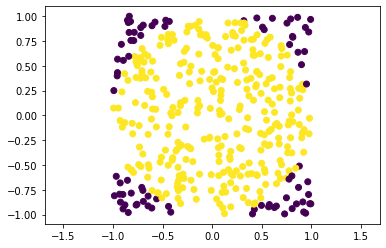

In [35]:
N = 400
samples = (np.random.random([N, 2]) - 0.5) * 2

plt.figure();
in_circle = (samples[:,0]**2 + samples[:, 1]**2) < 1
plt.scatter(samples[:, 0], samples[:, 1], c=in_circle)
plt.axis('equal');

good_samples = samples[in_circle]
x1 = good_samples[:, 0]
x2 = good_samples[:, 1]
print('Variance of x1 (estimated from samples): %.3f' % np.var(x1))

Next, let's think about sampling from a distribution with a complicated density. Suppose we want to sample from the distribution with density $p(x) \propto x \cdot (1.5-x) \cdot \sin(x)$ for $x \in [0,1.5]$:

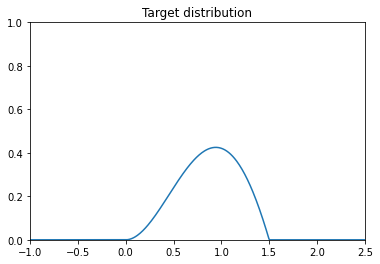

In [54]:
x = np.linspace(-1, 2.5, 500)
def target(x):
    return x * (1.5-x) * np.sin(x) * ((x > 0) & (x < 1.5))
plt.plot(x, target(x))
plt.title('Target distribution')
plt.axis([-1,2.5,0,1])
plt.show()

How can we make this look like the geometric example from before? Idea: "lifting" (add one dimension).

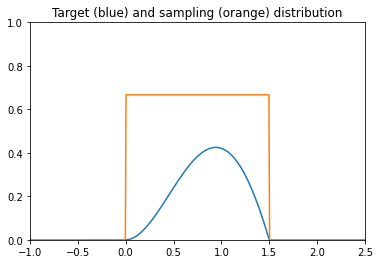

In [57]:
x = np.linspace(-1, 2.5, 500)
plt.plot(x, target(x))
plt.plot(x, stats.uniform.pdf(x, 0, 1.5))
plt.axis([-1,2.5,0,1])
plt.title('Target (blue) and sampling (orange) distribution')
plt.show()

Max accept prob: 0.425
Accepted 2459 out of 10000 proposals


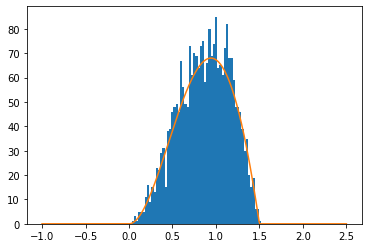

In [76]:
def rejection_sample_uniform(num_samples=100):
    proposals = stats.uniform.rvs(loc=0, scale=1.5, size=num_samples)
    accept_probs = target(proposals)
    print('Max accept prob: %.3f' % np.max(accept_probs))
    accept = accept_probs > stats.uniform.rvs(loc=0, scale=1, size=num_samples)
    num_accept = np.sum(accept)
    print('Accepted %d out of %d proposals' % (num_accept, num_samples))
    return proposals[accept]
samples = rejection_sample_uniform(num_samples=10000)
plt.hist(samples, bins=np.linspace(-0.5, 2, 100))
plt.plot(x, 160 * target(x))
plt.show()

As a final example, what happens if we want to sample across the entire real line? For instance, suppose our density is $p(x) \propto \exp(-x) |\sin(2x)|$ for $x \in [0, \infty)$. We certainly can't use a uniform proposal distribution, but using the exponential distribution works just fine.

Accepted 6077 out of 10000 proposals


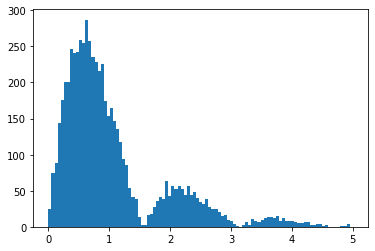

In [78]:
def rejection_sample_exponential(num_samples=100):
    proposals = stats.expon.rvs(loc=0,scale=1.0, size=num_samples)
    accept_probs = np.abs(np.sin(2*proposals))
    accept = accept_probs > stats.uniform.rvs(loc=0, scale=1, size=num_samples)
    num_accept = np.sum(accept)
    print('Accepted %d out of %d proposals' % (num_accept, num_samples))
    return proposals[accept]
samples = rejection_sample_exponential(num_samples=10000)
plt.hist(samples, bins=np.linspace(0, 5, 100))
plt.show()